Purpose of the Project: Build a model to predict if a patient has a high risk of Heart failure or not.

About this dataset

Age : Age of the patient

Sex : Sex of the patient (0 = female, 1 = male)

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack


In [1]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
#Read data and show first five rows
df = pd.read_csv(r"C:\Users\elegb\Desktop\pdf\heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:ylabel='output'>

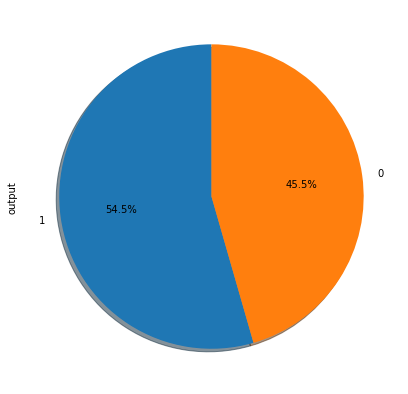

In [3]:
df.output.value_counts().plot(kind = "pie", figsize = (12,7),
                             autopct='%1.1f%%',
                             startangle=90, shadow=True,
                             )

54.5% of the total patients are at risk of high chance of heart attack while 45.5% of patients have a less chance of heart attack

<AxesSubplot:>

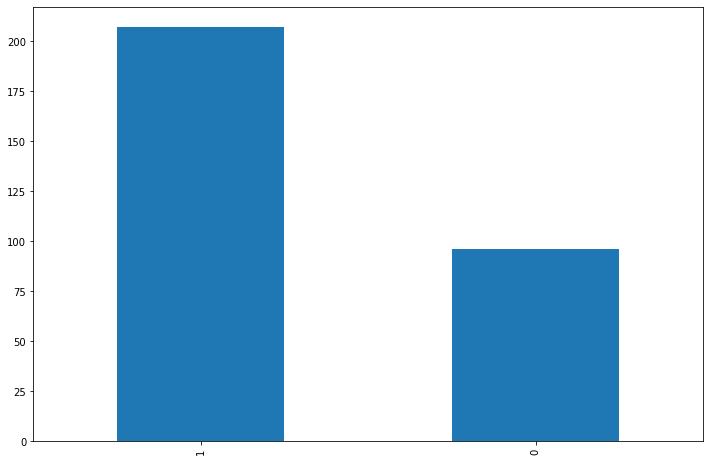

In [4]:
df.sex.value_counts().plot(kind = "bar", figsize = (12,8))

There are more male patients than female patients.

In [5]:
df.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

The average age of patients is 55 years, the youngest patient is 29years while the oldest patients 77 years

<AxesSubplot:ylabel='Frequency'>

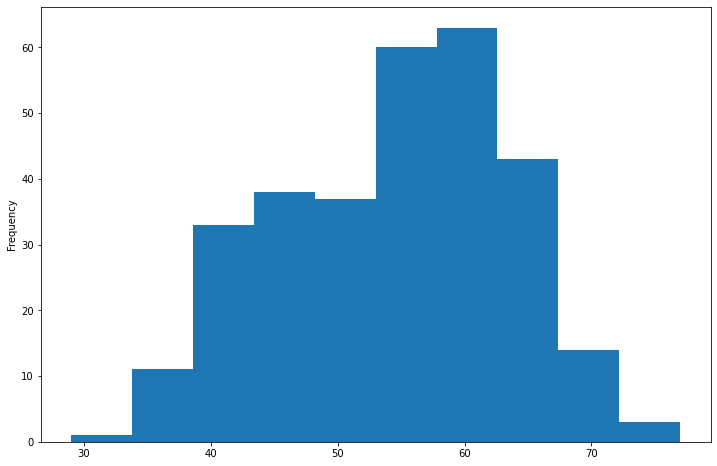

In [6]:
df.age.plot(kind = "hist", figsize = (12,8))

In [7]:
#Check the shape of the data
df.shape

(303, 14)

In [8]:
#pandas profiling of the dataset, more like rigorous summmary of the dataset
import pandas_profiling as pp
profile = pp.ProfileReport(df)

In [9]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
#check datatypes 
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [11]:
#check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There are no missing values in the data.

In [12]:
#Descriptive statistics of our data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

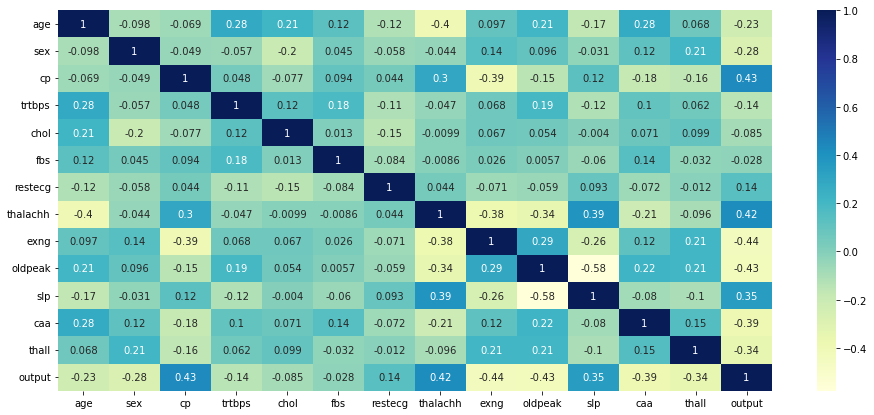

In [13]:
#correlation heatmap
plt.figure(figsize = (16,7))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot= True)

In [14]:
#Lets resguffle our data because our dependent variable is kind of boased.
df = df.sample(frac = 1, random_state = 42)

In [15]:
#Lets divide our data into training set and test set
train = df[:200]
test = df[200:303]
test.shape

(103, 14)

In [16]:
#Define x and y variables 
x = train.drop("output", axis = 1)
y = train.output

In [17]:
#split training set for training and testing
x_train, x_test,y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state = 42)
x_train.shape

(140, 13)

In [18]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
# fit the model
log_reg.fit(x_train, y_train)

C:\Users\elegb\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
#make prediction using the model
y_pred = log_reg.predict(x_test)

In [20]:
#bring our 103 test set and use it to predict using the model
test_data =test.drop("output", axis = 1)

In [21]:
#make prediction using the model
y_pred = log_reg.predict(test_data)

In [22]:
confusion_matrix(test.output, y_pred)

array([[38, 10],
       [ 7, 48]], dtype=int64)

using our test data to test the model.
Taking 0 to be nehative and 1 to be positive.
True positive: 38(Upper left)- Number of positives we predicted correctly.
True Negative: 48(lower right) - Number of negatives we predicted correctly.
False positive: 10(Upper right)- Number of positives we predicted wrongly.
False Negative: 7(lower left) - Number of Negatives we predicted wrongly.

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(test.output, y_pred)

0.8349514563106796

So we can say our Logistic regression model has an accuracy of 83.5%

In [24]:
#Random forest 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [25]:
y_pred =model.predict(test_data)
confusion_matrix(test.output, y_pred)

array([[36, 12],
       [ 7, 48]], dtype=int64)

using our test data to test the model.
Taking 0 to be nehative and 1 to be positive.
True positive: 36(Upper left)- Number of positives we predicted correctly.
True Negative: 48(lower right) - Number of negatives we predicted correctly.
False positive: 12(Upper right)- Number of positives we predicted wrongly.
False Negative: 7lower left) - Number of Negatives we predicted wrongly.

In [26]:
accuracy_score(test.output, y_pred)

0.8155339805825242

We can conclude that our Random forest model has an accuracy of 81.55%

In [27]:
#K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 15)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [28]:
y_pred =model.predict(test_data)
accuracy_score(test.output, y_pred)

0.6116504854368932

From the results we can say our K Nearest Neighbour model has an accuracy of 61.17%.

In [29]:
#Support vector machines (SVM)
from sklearn import svm
model = svm.SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [30]:
y_pred =model.predict(test_data)
accuracy_score(test.output, y_pred)

0.5922330097087378

our Supprt vector model has an accuracy of 59.22%.

In [31]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [32]:
#Confusion matrix
y_pred = model.predict(test_data)
confusion_matrix(test.output, y_pred)

array([[36, 12],
       [10, 45]], dtype=int64)

using our test data to test the model.
Taking 0 to be nehative and 1 to be positive.
True positive: 36(Upper left)- Number of positives we predicted correctly.
True Negative: 45(lower right) - Number of negatives we predicted correctly.
False positive: 12(Upper right)- Number of positives we predicted wrongly.
False Negative: 10(lower left) - Number of Negatives we predicted wrongly.

In [33]:
y_pred =model.predict(test_data)
accuracy_score(test.output, y_pred)

0.7864077669902912

Our Naive bayes model has an accuracy of 78.64%.

Conclusion: We have tested 5 classification models, and of the five, the model with the highest level of accuracy is the Logistic Regression model with an accuracy of 83.5%.